<a href="https://colab.research.google.com/github/michellepardo142-source/traduccion/blob/main/MPR_Copia_de_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# En profundidad: Análisis de componentes principales

Hasta ahora, hemos analizado en profundidad los estimadores de aprendizaje supervisado: aquellos estimadores que predicen etiquetas basándose en datos de entrenamiento etiquetados.
Aquí comenzamos a analizar varios estimadores no supervisados, que pueden resaltar aspectos interesantes de los datos sin referencia a ninguna etiqueta conocida.

En este capítulo, exploraremos el que quizás sea uno de los algoritmos no supervisados ​​más utilizados: el análisis de componentes principales (PCA).
El PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta para visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.
Tras una breve discusión conceptual del algoritmo PCA, exploraremos un par de ejemplos de estas aplicaciones adicionales.

Comenzamos con las importaciones estándar:

In [25]:
!pip install seaborn
import seaborn as sns

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")

## Introducción al Análisis de Componentes Principales

El análisis de componentes principales es un método no supervisado, rápido y flexible, para la reducción de la dimensionalidad de los datos, que vimos brevemente en [Introducción a Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Su comportamiento se visualiza más fácilmente observando un conjunto de datos bidimensionales.
Considere estos 200 puntos (véase la siguiente figura):

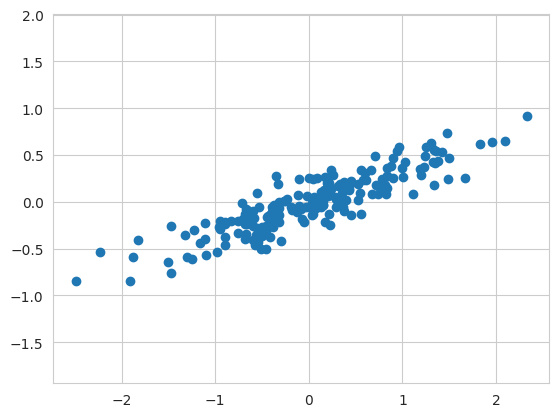

In [27]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, es evidente que existe una relación casi lineal entre las variables *x* e *y*.
Esto recuerda a los datos de regresión lineal que exploramos en [En profundidad: Regresión lineal](05.06-Linear-Regression.ipynb), pero el planteamiento del problema es ligeramente diferente: en lugar de intentar *predecir* los valores *y* a partir de los valores *x*, el problema de aprendizaje no supervisado intenta comprender la *relación* entre los valores *x* e *y*.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de *ejes principales* en los datos y utilizándolos para describir el conjunto de datos.
Utilizando el estimador `PCA` de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

El ajuste aprende algunas cantidades de los datos, principalmente los componentes y la varianza explicada:

In [29]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [30]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, utilizando los componentes para definir la dirección del vector y la varianza explicada para definir la longitud al cuadrado del vector (ver la siguiente figura):

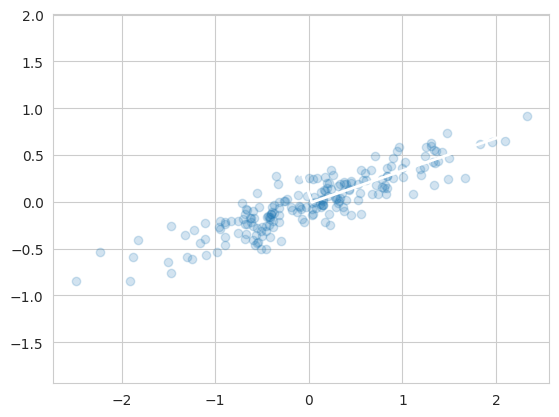

In [31]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud de cada vector indica la importancia de dicho eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos al proyectarse sobre dicho eje.
La proyección de cada punto de datos sobre los ejes principales constituye los componentes principales de los datos.

Si graficamos estos componentes principales junto a los datos originales, observamos los gráficos que se muestran en la siguiente figura:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/images/05.09-PCA-rotation.png?raw=1)
[figure source in Appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Principal-Components-Rotation)

Esta transformación de ejes de datos a ejes principales es una *transformación afín*, lo que significa que se compone de una traslación, una rotación y un escalado uniforme.

Si bien este algoritmo para encontrar componentes principales puede parecer una simple curiosidad matemática, resulta tener aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos.

### PCA como Reducción de Dimensionalidad

El uso de PCA para la reducción de dimensionalidad implica anular uno o más de los componentes principales más pequeños, lo que resulta en una proyección de los datos de menor dimensión que preserva la varianza máxima de los datos.

A continuación, se muestra un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:

In [32]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y representarlos gráficamente junto con los datos originales (véase la siguiente figura):

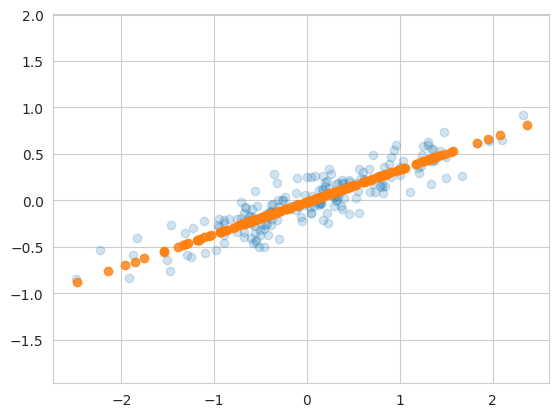

In [33]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada.
Esto aclara el significado de una reducción de dimensionalidad mediante PCA: se elimina la información a lo largo del eje o ejes principales menos importantes, dejando solo los componentes de los datos con mayor varianza.
La fracción de varianza que se elimina (proporcional a la dispersión de los puntos sobre la línea formada en la figura anterior) mide aproximadamente cuánta información se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en cierto sentido, lo suficientemente bueno como para codificar las relaciones más importantes entre los puntos: a pesar de reducir el número de características de los datos en un 50 %, las relaciones generales entre los puntos de datos se conservan en su mayor parte.

### PCA for Visualization: Handwritten Digits

The usefulness of dimensionality reduction may not be entirely apparent in only two dimensions, but it becomes clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits dataset we worked with in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb).

We'll start by loading the data:

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recuerde que el conjunto de datos de dígitos consta de imágenes de 8 × 8 píxeles, lo que significa que tienen 64 dimensiones.
Para comprender mejor las relaciones entre estos puntos, podemos usar el análisis de componentes principales (PCA) para proyectarlos en un número más manejable de dimensiones, por ejemplo, dos:

In [35]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Ahora podemos trazar los dos primeros componentes principales de cada punto para conocer los datos, como se ve en la siguiente figura:

/tmp/ipython-input-2943749715.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


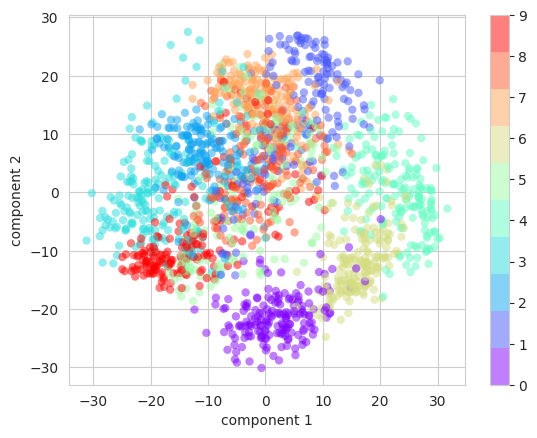

In [36]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recuerde el significado de estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con mayor varianza.
En esencia, hemos encontrado el estiramiento y la rotación óptimos en un espacio de 64 dimensiones que nos permite ver la disposición de los datos en dos dimensiones, y lo hemos hecho de forma no supervisada, es decir, sin referencia a las etiquetas.

### ¿Qué significan los componentes?

Podemos profundizar un poco más y empezar a preguntarnos qué *significan* las dimensiones reducidas.
Este significado puede entenderse en términos de combinaciones de vectores base.
Por ejemplo, cada imagen del conjunto de entrenamiento se define por un conjunto de 64 valores de píxel, al que llamaremos vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma de entender esto es en términos de una base de píxel. Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe y luego sumamos los resultados para construir la imagen:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Una forma de reducir la dimensionalidad de estos datos es poner a cero todos los vectores base, salvo algunos.
Por ejemplo, si usamos solo los primeros ocho píxeles, obtenemos una proyección de ocho dimensiones de los datos (la siguiente figura). Sin embargo, no refleja bien la imagen completa: ¡hemos descartado casi el 90 % de los píxeles!

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/images/05.09-digits-pixel-components.png?raw=1)
[figure source in Appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Digits-Pixel-Components)

La fila superior de paneles muestra los píxeles individuales, y la fila inferior muestra la contribución acumulada de estos píxeles a la construcción de la imagen.
Utilizando solo ocho de los componentes de base de píxeles, solo podemos construir una pequeña porción de la imagen de 64 píxeles.
Si continuáramos esta secuencia y utilizáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación píxel por píxel no es la única opción de base. También podemos usar otras funciones base, cada una con una contribución predefinida de cada píxel, y escribir algo como:

$$
image(x) = {\rm media} + x_1 \cdot{\rm (base~1)} + x_2 \cdot{\rm (base~2)} + x_3 \cdot{\rm (base~3)} \cdots
$$

El ACP puede considerarse como un proceso de elección de funciones base óptimas, de modo que la suma de las primeras sea suficiente para reconstruir adecuadamente la mayor parte de los elementos del conjunto de datos.
Los componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos de esta serie.
La siguiente figura muestra una representación similar de la reconstrucción del mismo dígito utilizando la media más las primeras ocho funciones base del ACP.

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/images/05.09-digits-pca-components.png?raw=1)
[figure source in Appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Digits-PCA-Components)

A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características destacadas de la imagen de entrada con solo una media, ¡más ocho componentes!
La cantidad de cada píxel en cada componente es el corolario de la orientación del vector en nuestro ejemplo bidimensional.
En este sentido, el PCA proporciona una representación de baja dimensión de los datos: descubre un conjunto de funciones de base más eficientes que la base de píxeles nativa de los datos de entrada.

### Elección del número de componentes

Un aspecto fundamental del uso del ACP en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos.
Esto se puede determinar observando la *razón de varianza explicada* acumulada en función del número de componentes (véase la siguiente figura):

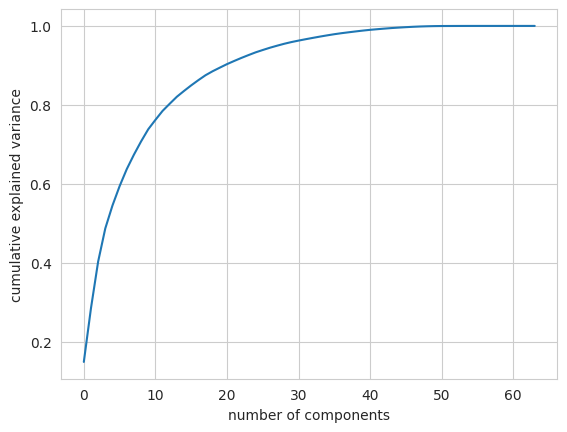

In [37]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Esta curva cuantifica la proporción de la varianza total de 64 dimensiones contenida en los primeros $N$ componentes.

Por ejemplo, observamos que, con los datos de dígitos, los primeros 10 componentes contienen aproximadamente el 75 % de la varianza, mientras que se necesitan alrededor de 50 componentes para describir cerca del 100 % de la varianza.

Esto indica que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90 % de la varianza. Observar este gráfico para un conjunto de datos de alta dimensión puede ayudar a comprender el nivel de redundancia presente en sus características.

## PCA como Filtrado de Ruido

El PCA también puede utilizarse como método de filtrado para datos ruidosos.
La idea es la siguiente: cualquier componente con una varianza mucho mayor que el efecto del ruido debería verse relativamente inafectado por este.
Por lo tanto, si se reconstruyen los datos utilizando únicamente el subconjunto más grande de componentes principales, se debería conservar preferentemente la señal y descartar el ruido.

Veamos cómo se ve esto con los datos de dígitos.
Primero, graficaremos varias de las muestras de entrada sin ruido (la siguiente figura):

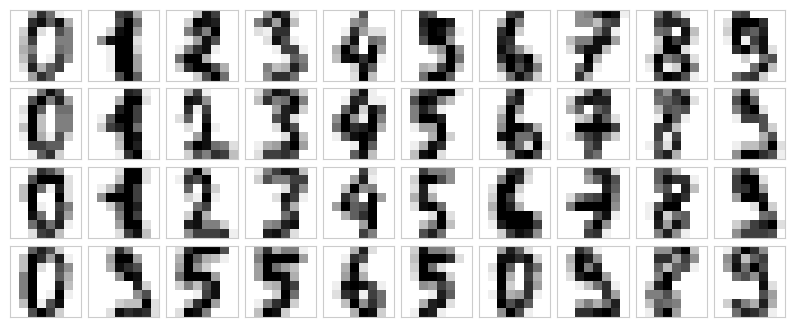

In [38]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso y grafiquemos (la siguiente figura):

In [39]:
rng = np.random.default_rng(42)
rng.normal(10, 2)

10.609434159508863

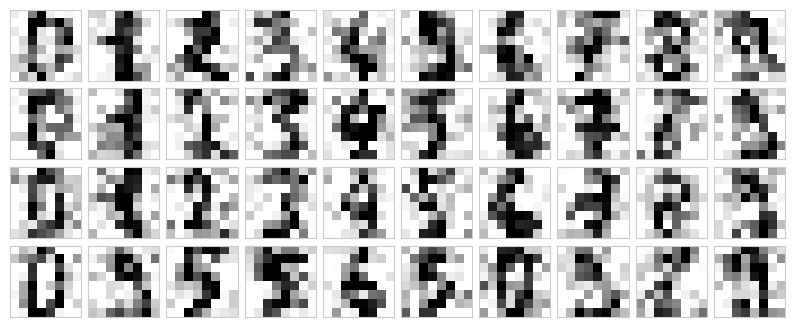

In [40]:
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

La visualización evidencia la presencia de este ruido aleatorio.
Entrenemos un modelo PCA con los datos ruidosos, solicitando que la proyección conserve el 50 % de la varianza:

In [41]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

np.int64(12)

Aquí, el 50 % de la varianza equivale a 12 componentes principales, de las 64 características originales.
Ahora calculamos estos componentes y luego usamos la inversa de la transformación para reconstruir los dígitos filtrados; la siguiente figura muestra el resultado:

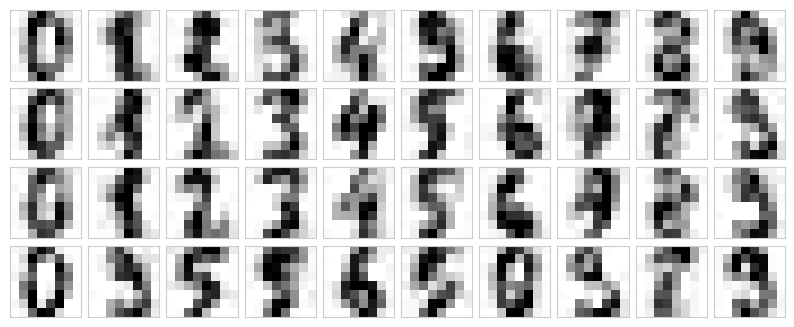

In [42]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservación de señal/filtrado de ruido hace que PCA sea una rutina de selección de características muy útil: por ejemplo, en lugar de entrenar un clasificador con datos de dimensiones muy altas, puede entrenar el clasificador con la representación del componente principal de dimensiones más bajas, que servirá automáticamente para filtrar el ruido aleatorio en las entradas.

## Ejemplo: Rostros propios

Anteriormente, exploramos un ejemplo del uso de una proyección PCA como selector de características para el reconocimiento facial con una máquina de vectores de soporte (véase [A fondo: Máquinas de vectores de soporte](05.07-Support-Vector-Machines.ipynb)).
Aquí analizaremos en retrospectiva y analizaremos con más detalle su funcionamiento.
Recordemos que utilizamos el conjunto de datos Rostros Etiquetados en la Naturaleza (LFW), disponible a través de Scikit-Learn:

In [43]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Analicemos los ejes principales que abarcan este conjunto de datos.
Dado que se trata de un conjunto de datos extenso, utilizaremos el solucionador de autovalores aleatorio en el estimador PCA: este método aleatorio aproxima los primeros $N$ componentes principales con mayor rapidez que el enfoque estándar, a costa de cierta precisión. Esta compensación puede ser útil para datos de alta dimensión (en este caso, una dimensionalidad cercana a 3000).
Analizaremos los primeros 150 componentes:

In [44]:
pca = PCA(150, svd_solver='randomized', random_state=42)
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

En este caso, puede ser interesante visualizar las imágenes asociadas a los primeros componentes principales (estos componentes se conocen técnicamente como *vectores propios*, por lo que este tipo de imágenes a menudo se denominan *caras propias*; como se puede ver en la siguiente figura, son tan espeluznantes como suenan):

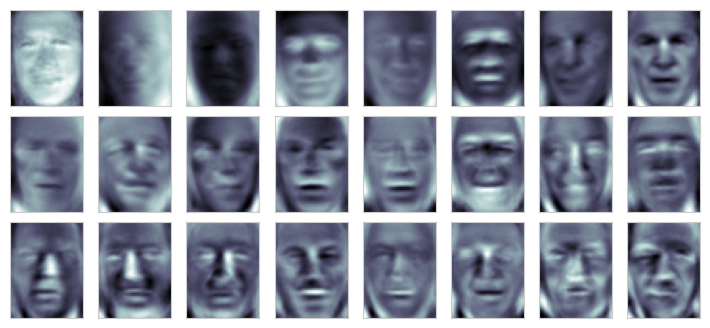

In [45]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Los resultados son muy interesantes y nos permiten comprender cómo varían las imágenes: por ejemplo, las primeras caras propias (desde la esquina superior izquierda) parecen estar asociadas con el ángulo de iluminación de la cara, y los vectores principales posteriores parecen destacar ciertas características, como ojos, narices y labios.
Analicemos la varianza acumulada de estos componentes para ver cuánta información de los datos conserva la proyección (véase la siguiente figura).

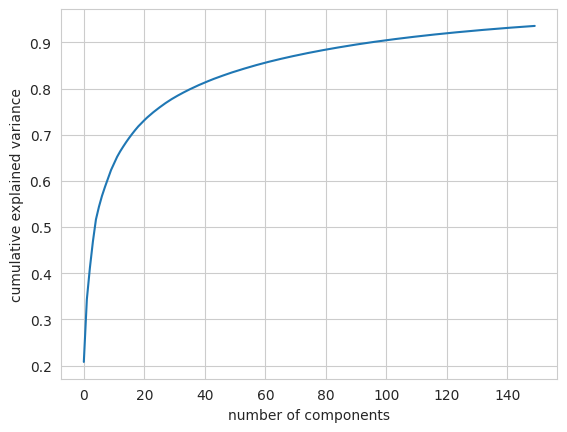

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Los 150 componentes que hemos elegido explican poco más del 90 % de la varianza.
Esto nos lleva a creer que, al utilizar estos 150 componentes, recuperaríamos la mayoría de las características esenciales de los datos.
Para concretar esto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes (véase la siguiente figura):

In [47]:
# Compute the components and projected faces
pca = pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

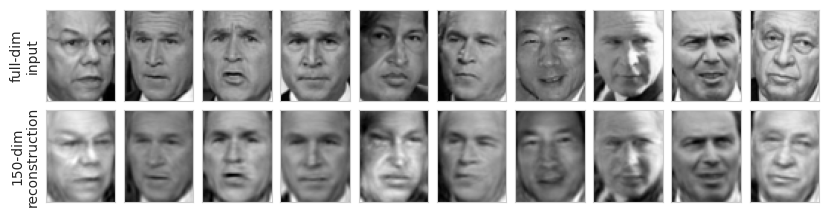

In [48]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

La fila superior muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes a partir de solo 150 de las aproximadamente 3000 características iniciales.
Esta visualización explica por qué la selección de características PCA utilizada en [En profundidad: Máquinas de Vectores de Soporte](05.07-Support-Vector-Machines.ipynb) tuvo tanto éxito: aunque reduce la dimensionalidad de los datos casi 20 veces, las imágenes proyectadas contienen suficiente información para que podamos reconocer a simple vista a los individuos en cada imagen. Esto significa que nuestro algoritmo de clasificación solo necesita entrenarse con datos de 150 dimensiones en lugar de datos de 3000 dimensiones, lo que, según el algoritmo elegido, puede resultar en una clasificación mucho más eficiente.

## Resumen

En este capítulo, exploramos el uso del análisis de componentes principales para la reducción de dimensionalidad, la visualización de datos de alta dimensión, el filtrado de ruido y la selección de características en datos de alta dimensión.
Gracias a su versatilidad e interpretabilidad, el PCA ha demostrado ser eficaz en una amplia variedad de contextos y disciplinas.
Dado cualquier conjunto de datos de alta dimensión, suelo empezar con el PCA para visualizar las relaciones entre puntos (como hicimos con los datos de dígitos), comprender la varianza principal de los datos (como hicimos con las caras propias) y comprender la dimensionalidad intrínseca (graficando la razón de varianza explicada).
Si bien el PCA no es útil para todos los conjuntos de datos de alta dimensión, ofrece una forma sencilla y eficiente de comprender mejor estos datos.

La principal debilidad del PCA es que tiende a verse muy afectado por los valores atípicos en los datos. Por esta razón, se han desarrollado diversas variantes robustas del ACP, muchas de las cuales descartan iterativamente los puntos de datos mal descritos por los componentes iniciales.
Scikit-Learn incluye varias variantes interesantes del ACP en el submódulo `sklearn.decomposition`; un ejemplo es `SparsePCA`, que introduce un término de regularización (véase [En profundidad: Regresión lineal](05.06-Linear-Regression.ipynb)) que sirve para reforzar la escasez de los componentes.

En los siguientes capítulos, analizaremos otros métodos de aprendizaje no supervisado que se basan en algunas de las ideas del ACP.